In [10]:
from avatar_models.utils.util import get_config
import pandas as pd
import os
from tqdm import tqdm
from avatar_models.captioning.catr.predict import CATRInference
from avatar_models.utils.bleu import get_ms_coco_captions
from avatar_models.utils.util import resize_img_to_array, image_grid, get_ade20_vqa_data, load_preprocessed_vqa_data
from avatar_models.vqa.lxmert.lxmert import LXMERTInference
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import numpy as np

# Show Predictions of the CATR Captioning Model 

Dev Setup: dev_config.json will be used
Dev Setup: dev_config.json will be used
Use CATR Model with GPU cuda:0


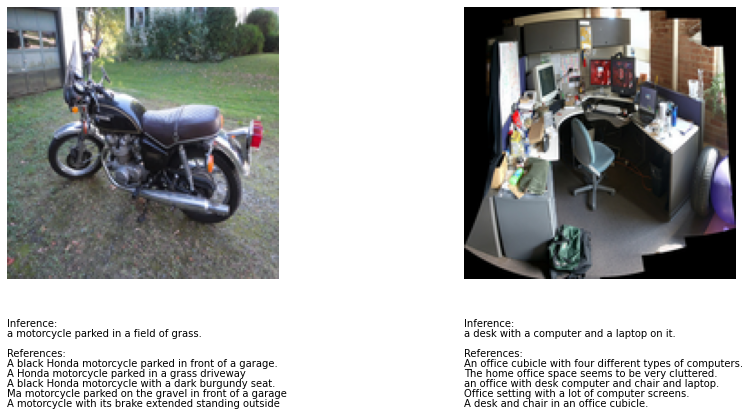

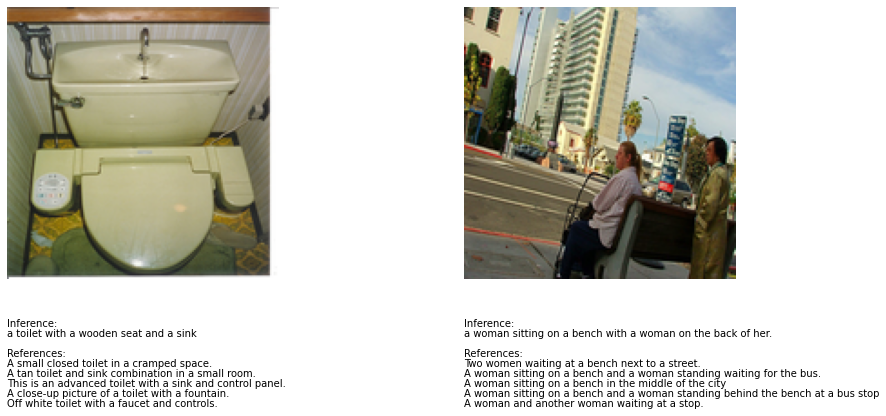

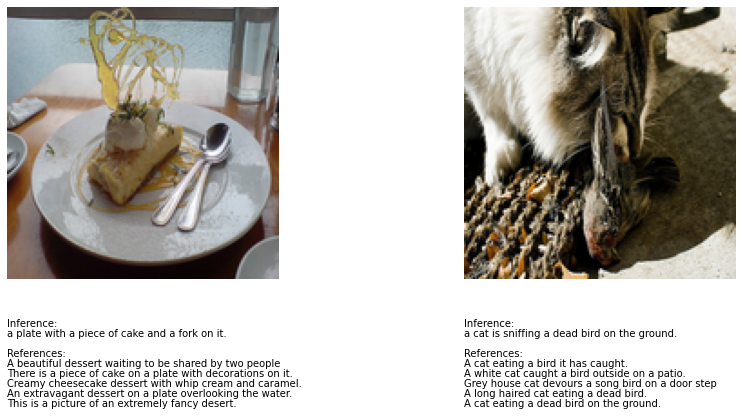

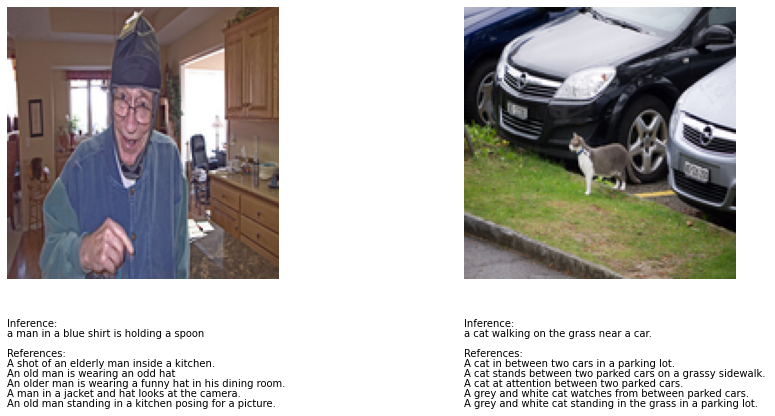

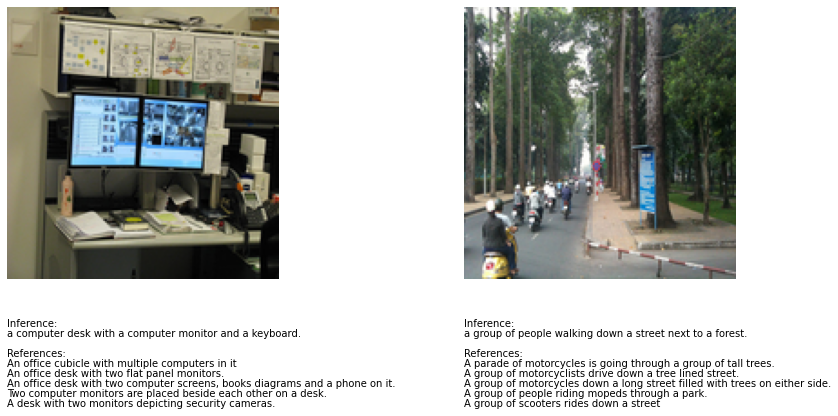

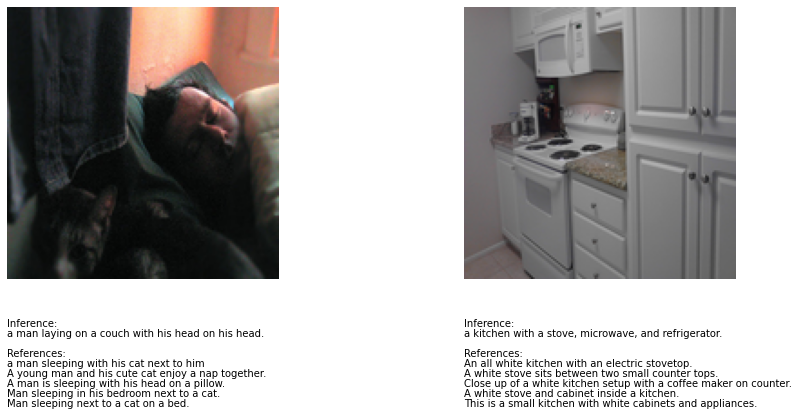

In [11]:
#TODO Does react to columns / rows config... Fix that

IMAGES_TO_DISPLAY = 12
COLUMNS = 2
captions = get_ms_coco_captions(image_number=IMAGES_TO_DISPLAY)
caption_expert = CATRInference()
refs = [ captions[k] for k in captions.keys()]
all_cap = []

# For a given image, pack all inferences and references in a list
# each element will be printed in a "column"
for i, k in enumerate(captions.keys()):
    cap = [ "Inference:\n",  caption_expert.infer(k), "","References:\n" ]
    cap.extend(captions[k])
    all_cap.append(cap)

img_paths = list(captions.keys())
image_grid(img_paths, all_cap, top=IMAGES_TO_DISPLAY, per_row=COLUMNS)

# LXMERT VQA

In [12]:
QUESTIONS_TO_DISPLAY = 12
COLUMNS = 2
model = "vqa"
vqa_lxmert = LXMERTInference(model)
answer_vocab_lxmert = vqa_lxmert.get_answers()

conf = get_config()
ADE20K_DIR = conf["ade20k_dir"]
VQA_FILE = conf["ade20k_vqa_file_test"]
data = get_ade20_vqa_data(VQA_FILE)

filtered_data = [d for i, d in tqdm(enumerate(data)) if d["answer"] in answer_vocab_lxmert]
df = pd.DataFrame(filtered_data)
questions = df["question"].apply(lambda x: " ".join(text_to_word_sequence(x)))
answers = df["answer"]
image_paths_val = df["image_path"].apply(lambda x: os.path.join(ADE20K_DIR, "images", x))



Dev Setup: dev_config.json will be used
Loading default VQA Model for LXMERT
loading configuration file cache
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /home/rafi/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.
Dev Setup: dev_config.json will be used
Dev Setup: dev_config.json will be used
Reading /home/rafi/PycharmProjects/sose21-pm-language-and-vision-g1/data/ade20k_vqa/merged_synthetic_vqa_test.jsonl


119932it [00:02, 47590.79it/s]


## Synthetic VQA DATASET for ADE20K

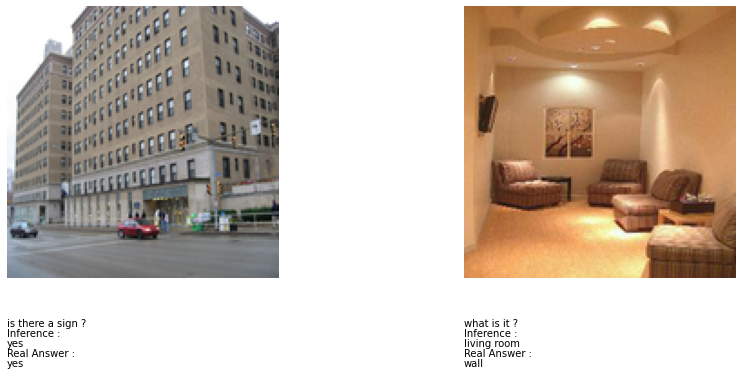

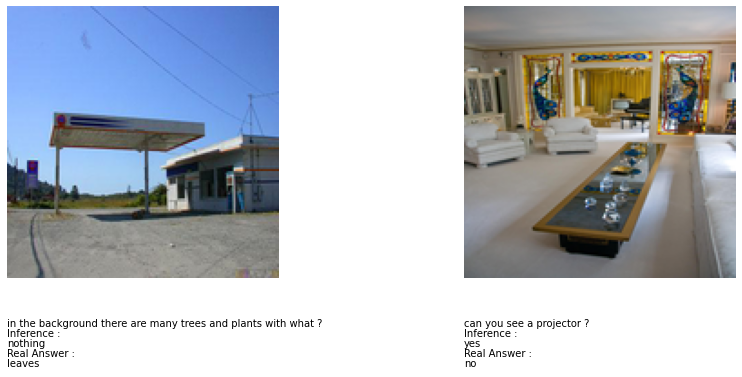

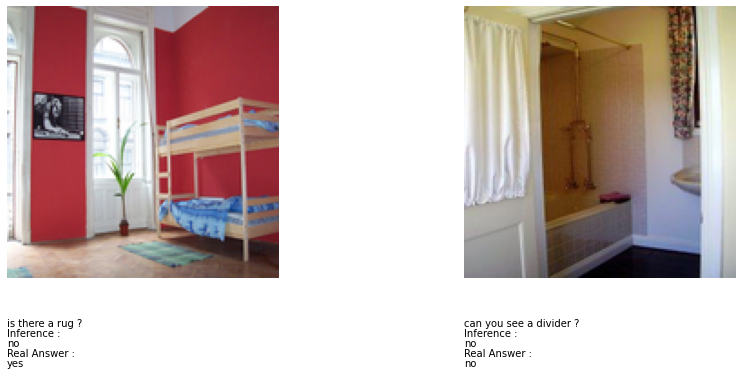

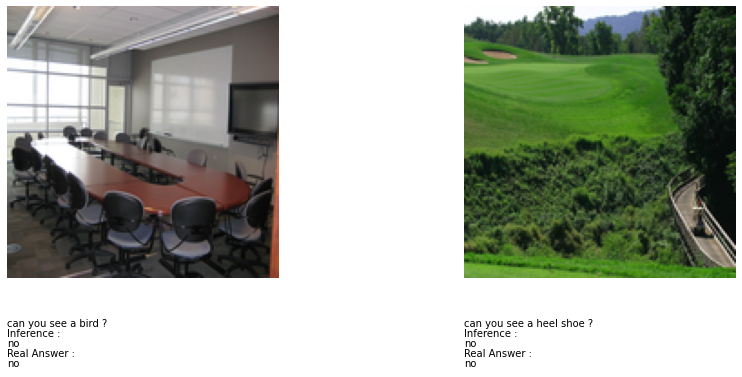

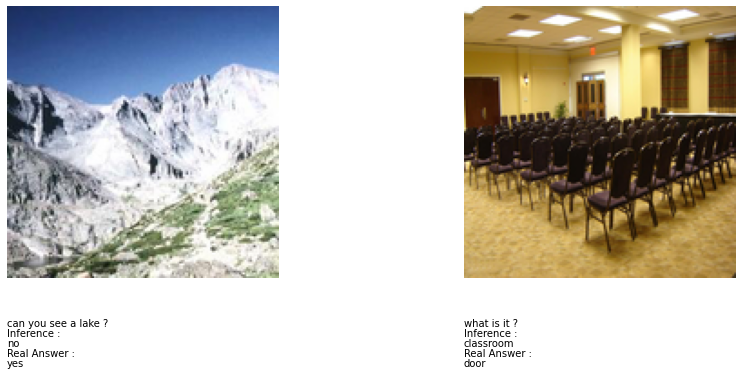

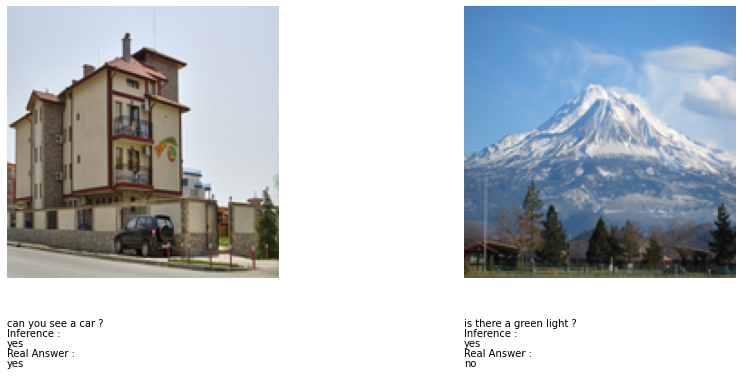

In [13]:
displayed_questions = questions[:QUESTIONS_TO_DISPLAY]
displayed_images = image_paths_val[:QUESTIONS_TO_DISPLAY]
displayed_answers = answers[:QUESTIONS_TO_DISPLAY]

all_qa = [ [question + " ?\n", "Inference : \n", vqa_lxmert.infer(image, question), "Real Answer : \n", answer ]    for i, (question, image, answer) in enumerate(zip(displayed_questions, displayed_images, displayed_answers))]

image_grid(displayed_images, all_qa, top=QUESTIONS_TO_DISPLAY, per_row=COLUMNS)

## Official VQA Dataset

Dev Setup: dev_config.json will be used


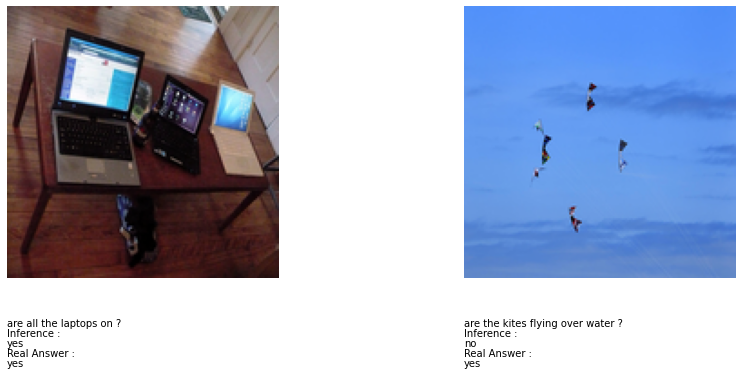

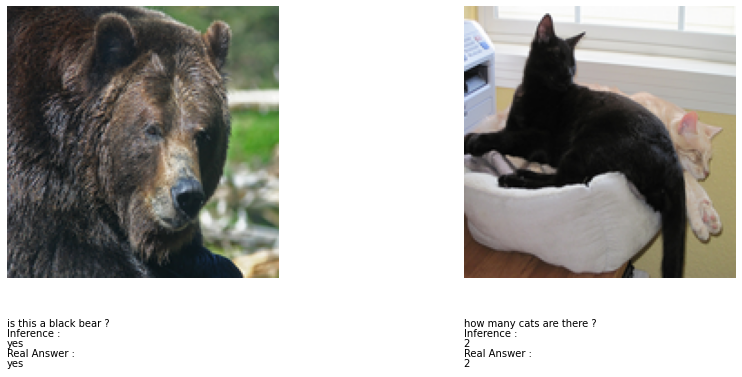

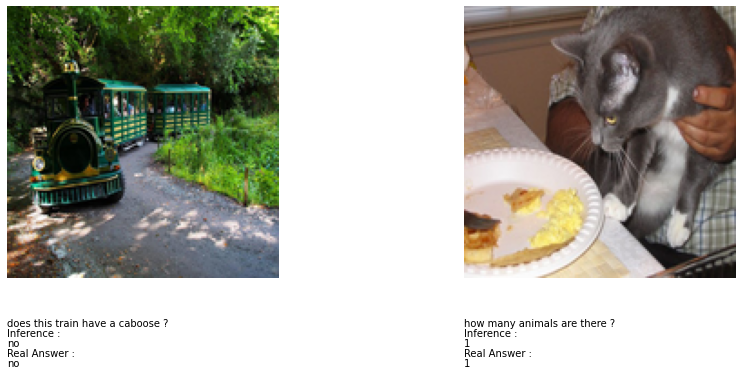

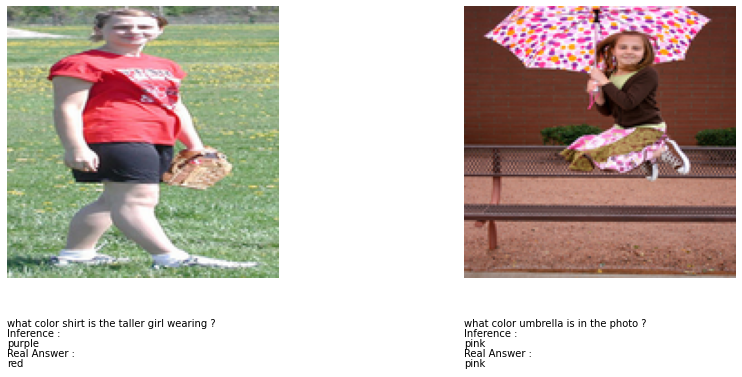

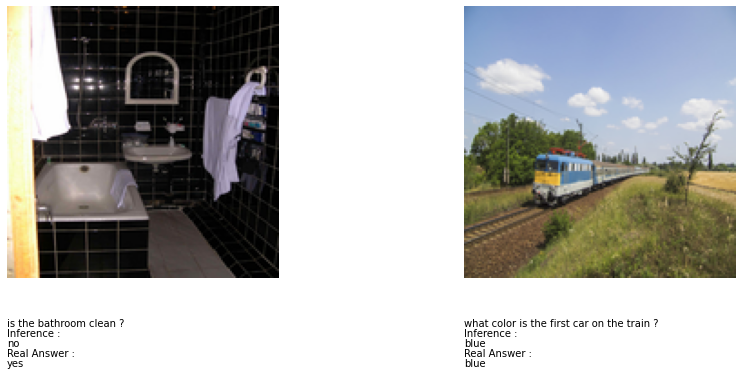

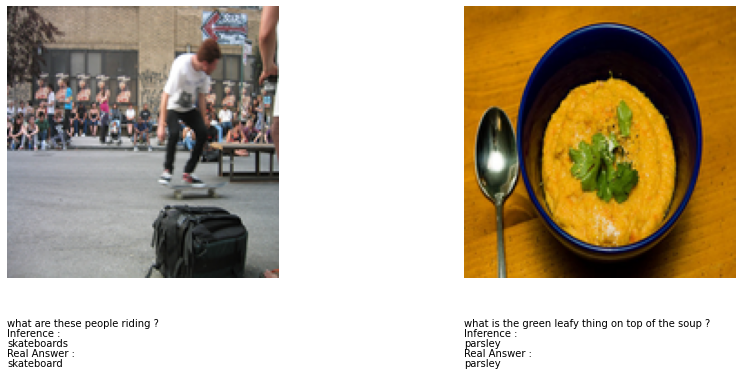

In [14]:
_, X_val, _, _, _, _ = load_preprocessed_vqa_data()
MS_COCO_DIR = conf["ms_coco_dir"]
derived_answer_col_id = np.where(X_val.columns.values == "derived_answer")[0]
coco_train = os.path.join(MS_COCO_DIR, "train2017")
coco_filtered = pd.DataFrame( [row for row in X_val.itertuples(index=False) if row[int(derived_answer_col_id)] in answer_vocab_lxmert])
# removing first and lasttoken <start>, <end>
coco_questions = coco_filtered["question"].apply(lambda x: " ".join(text_to_word_sequence(x)[1:-1]))
coco_answers = coco_filtered["derived_answer"]
coco_image_paths_val = coco_filtered['image_id'].apply(lambda x: os.path.join(coco_train, '%012d.jpg' % (x))).values

displayed_coco_questions = coco_questions[:QUESTIONS_TO_DISPLAY]
displayed_coco_images = coco_image_paths_val[:QUESTIONS_TO_DISPLAY]
displayed_coco_answers = coco_answers[:QUESTIONS_TO_DISPLAY]

all_coco_qa = [ [question + " ?\n", "Inference : \n", vqa_lxmert.infer(image, question), "Real Answer : \n", answer ]    for i, (question, image, answer) in enumerate(zip(displayed_coco_questions, displayed_coco_images, displayed_coco_answers))]

image_grid(displayed_coco_images, all_coco_qa, top=QUESTIONS_TO_DISPLAY, per_row=COLUMNS)

# LXMERT GQA

In [15]:
model = "gqa"
gqa_lxmert = LXMERTInference(model)
answer_vocab_lxmert_gqa = gqa_lxmert.get_answers()



filtered_data = [d for i, d in tqdm(enumerate(data)) if d["answer"] in answer_vocab_lxmert_gqa]
df = pd.DataFrame(filtered_data)
questions = df["question"].apply(lambda x: " ".join(text_to_word_sequence(x)))
answers = df["answer"]
image_paths_val = df["image_path"].apply(lambda x: os.path.join(ADE20K_DIR, "images", x))

Dev Setup: dev_config.json will be used
Loading GQA Model for LXMERT
loading configuration file cache
loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /home/rafi/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


119932it [00:01, 64655.70it/s]


## Synthetic VQA DATASET for ADE20K

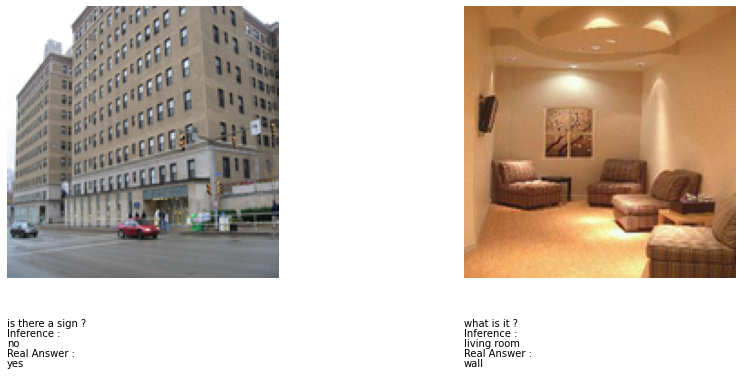

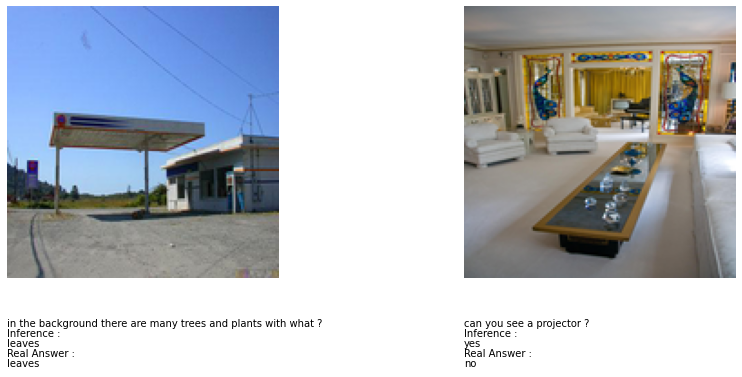

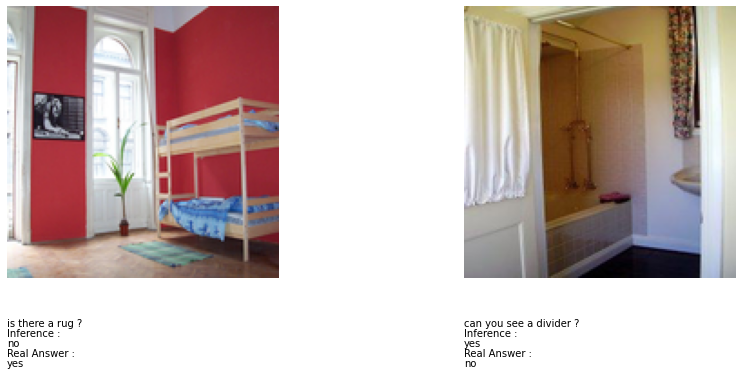

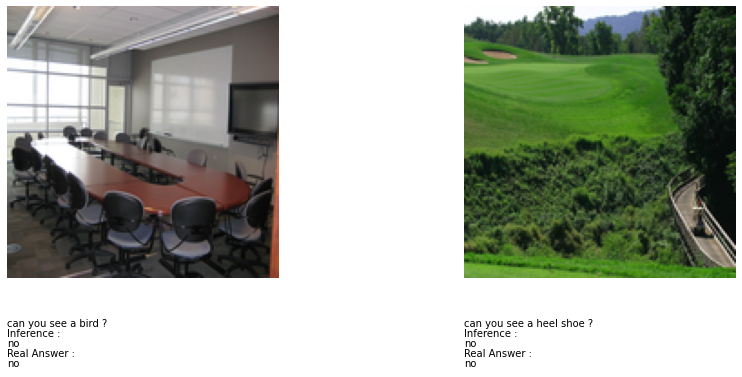

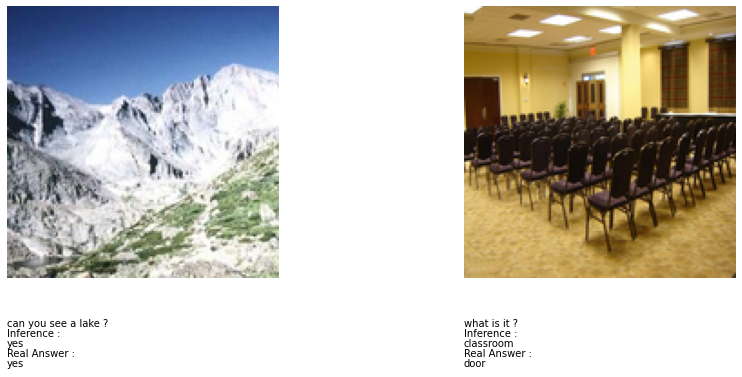

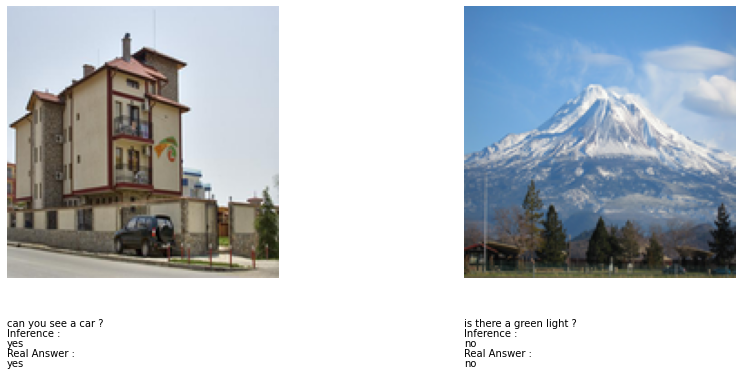

In [16]:
displayed_questions = questions[:QUESTIONS_TO_DISPLAY]
displayed_images = image_paths_val[:QUESTIONS_TO_DISPLAY]
displayed_answers = answers[:QUESTIONS_TO_DISPLAY]

all_qa = [ [question + " ?\n", "Inference : \n", gqa_lxmert.infer(image, question), "Real Answer : \n", answer ]    for i, (question, image, answer) in enumerate(zip(displayed_questions, displayed_images, displayed_answers))]

image_grid(displayed_images, all_qa, top=QUESTIONS_TO_DISPLAY, per_row=COLUMNS)

## Official VQA Dataset

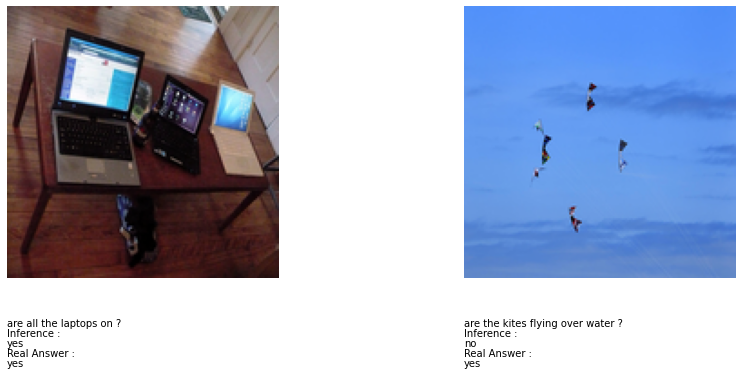

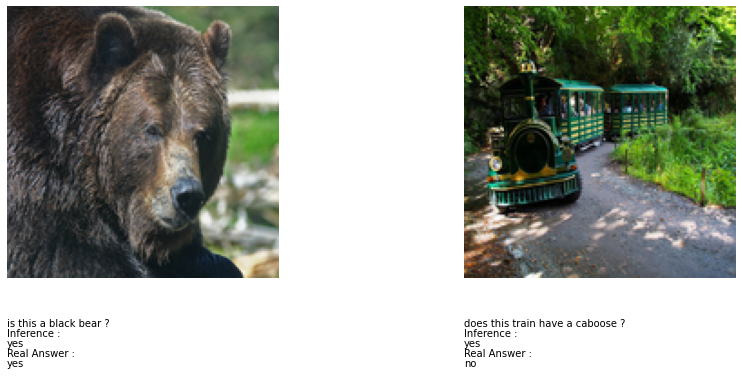

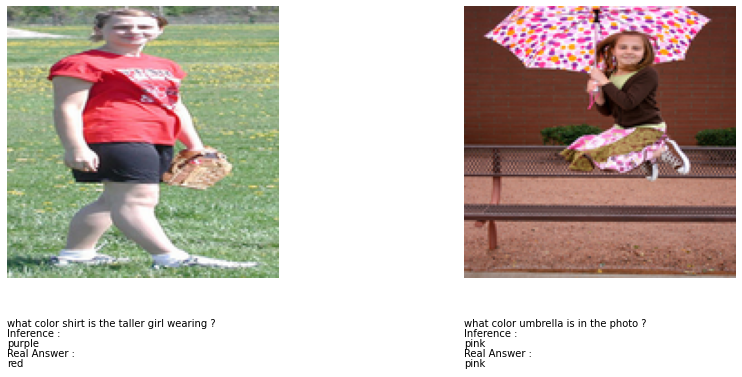

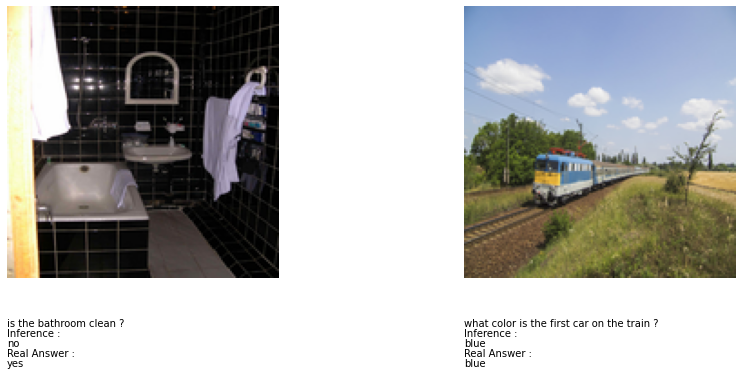

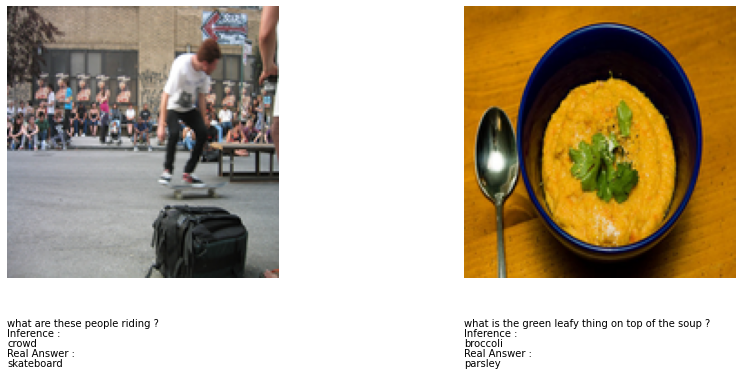

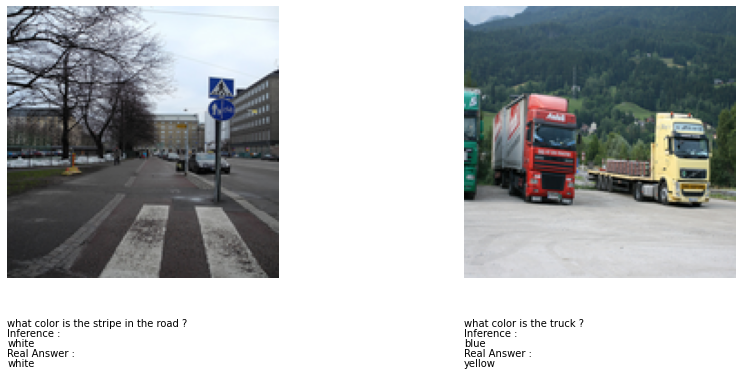

In [17]:
coco_filtered = pd.DataFrame( [row for row in X_val.itertuples(index=False) if row[int(derived_answer_col_id)] in answer_vocab_lxmert_gqa])
# removing first and lasttoken <start>, <end>
coco_questions = coco_filtered["question"].apply(lambda x: " ".join(text_to_word_sequence(x)[1:-1]))
coco_answers = coco_filtered["derived_answer"]
coco_image_paths_val = coco_filtered['image_id'].apply(lambda x: os.path.join(coco_train, '%012d.jpg' % (x))).values

displayed_coco_questions = coco_questions[:QUESTIONS_TO_DISPLAY]
displayed_coco_images = coco_image_paths_val[:QUESTIONS_TO_DISPLAY]
displayed_coco_answers = coco_answers[:QUESTIONS_TO_DISPLAY]

all_coco_qa = [ [question + " ?\n", "Inference : \n", gqa_lxmert.infer(image, question), "Real Answer : \n", answer ]    for i, (question, image, answer) in enumerate(zip(displayed_coco_questions, displayed_coco_images, displayed_coco_answers))]

image_grid(displayed_coco_images, all_coco_qa, top=QUESTIONS_TO_DISPLAY, per_row=COLUMNS)